Wine quality prediction

Balancing the dataset, preprocessing the data and building and comparing three classification models: logistic regression, support vector machines and a random forest classifier

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [46]:
ds=pd.read_csv('wineQualityReds.csv')

In [39]:
ds.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [48]:
ds=ds.drop('Unnamed: 0',axis=1)

In [49]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile.acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric.acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual.sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free.sulfur.dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total.sulfur.dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


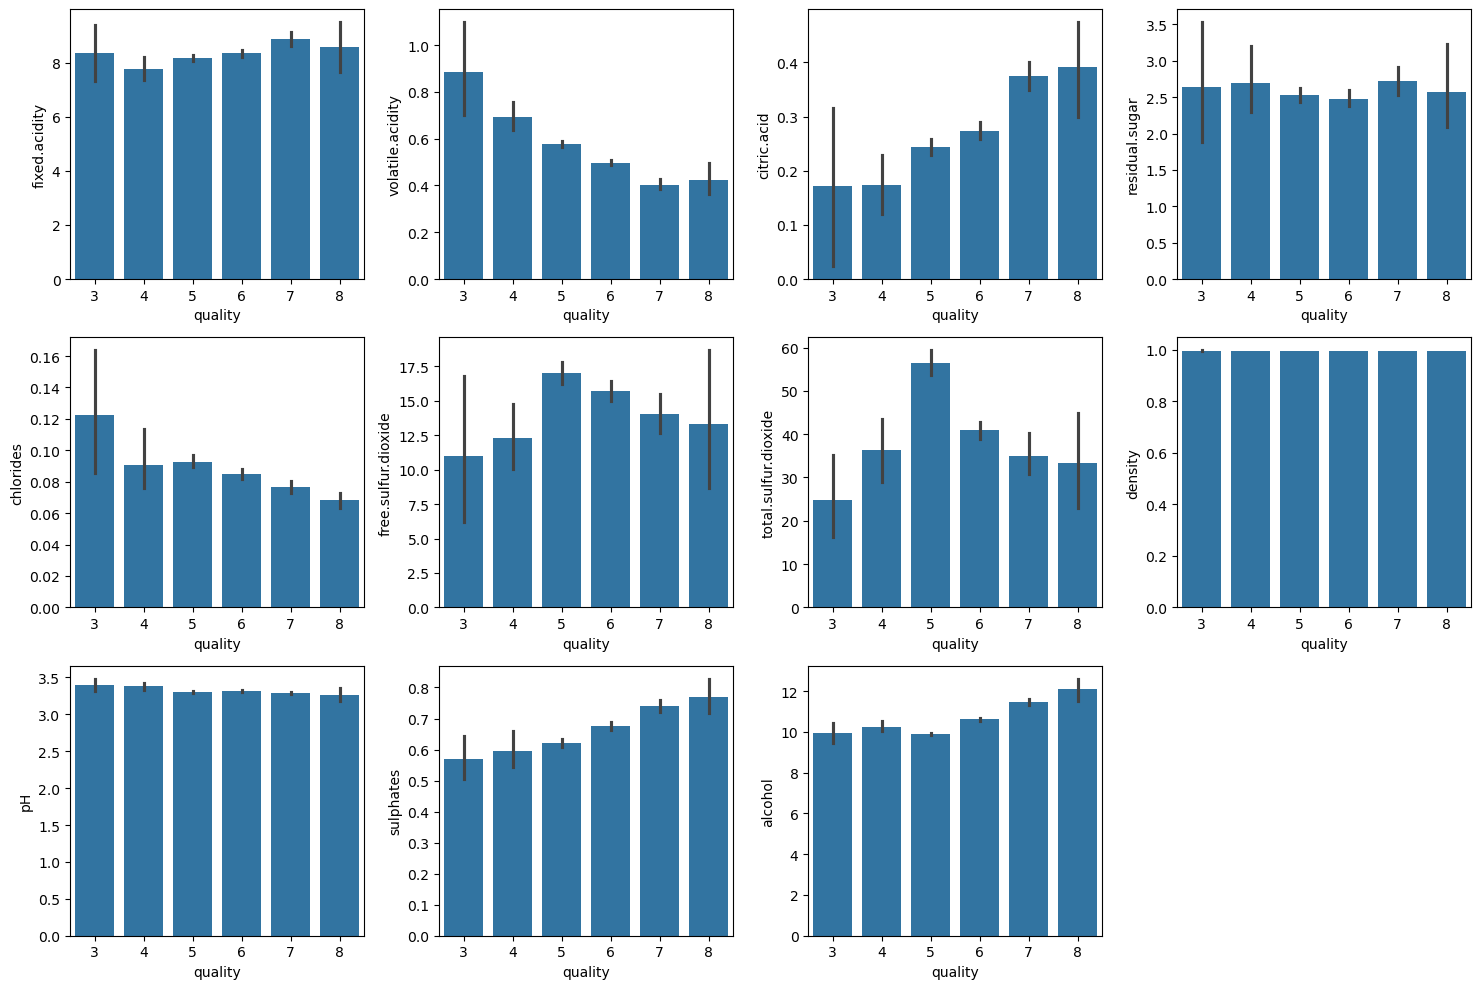

In [52]:
fig = plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.barplot(x='quality',y='fixed.acidity',data=ds)
plt.subplot(3,4,2)
sns.barplot(x='quality',y='volatile.acidity',data=ds)
plt.subplot(3,4,3)
sns.barplot(x='quality',y='citric.acid',data=ds)
plt.subplot(3,4,4)
sns.barplot(x='quality',y='residual.sugar',data=ds)
plt.subplot(3,4,5)
sns.barplot(x='quality',y='chlorides',data=ds)
plt.subplot(3,4,6)
sns.barplot(x='quality',y='free.sulfur.dioxide',data=ds)
plt.subplot(3,4,7)
sns.barplot(x='quality',y='total.sulfur.dioxide',data=ds)
plt.subplot(3,4,8)
sns.barplot(x='quality',y='density',data=ds)
plt.subplot(3,4,9)
sns.barplot(x='quality',y='pH',data=ds)
plt.subplot(3,4,10)
sns.barplot(x='quality',y='sulphates',data=ds)
plt.subplot(3,4,11)
sns.barplot(x='quality',y='alcohol',data=ds)
plt.tight_layout()

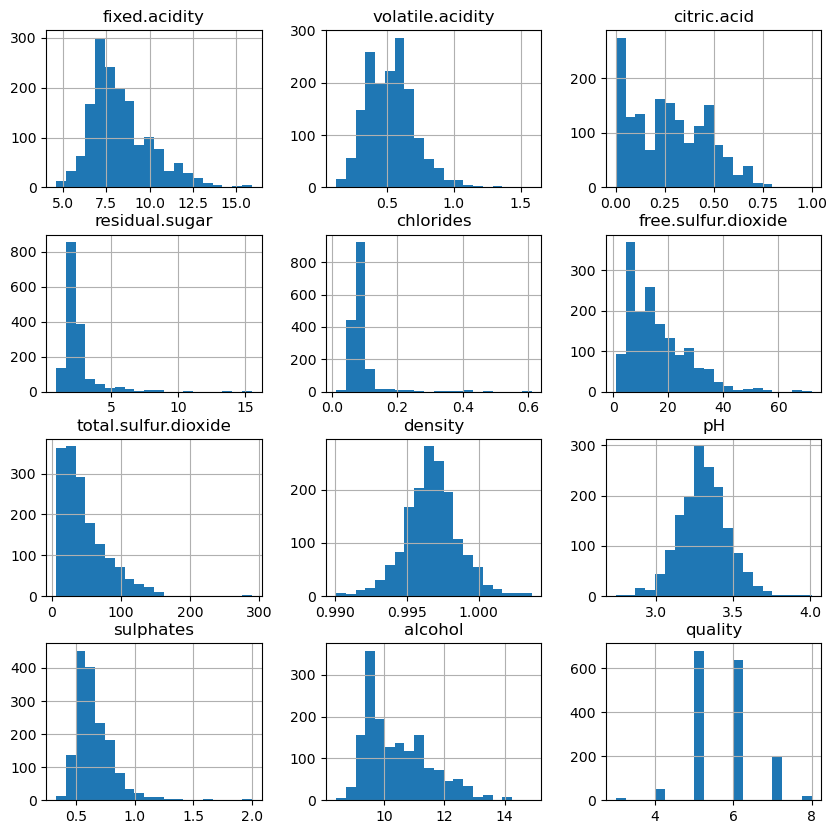

In [8]:
ds.hist(bins=20, figsize=(10, 10))
plt.show()


In [53]:
ds.shape


(1599, 12)

In [54]:
ds.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [55]:
#counting the number of instances for each class
ds['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

As there are 6 classes of qualities, we will mark every rating going from 3 to 6 as bad and from 7 to 8 as good

In [56]:
ranges = (2,6.5,8) 
groups = ['bad','good']
ds['quality'] = pd.cut(ds['quality'],bins=ranges,labels=groups)

In [62]:
#replacing bad with 0 and good with 1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['quality']=le.fit_transform(ds['quality'])
print(ds['quality'].value_counts())

quality
0    1382
1     217
Name: count, dtype: int64


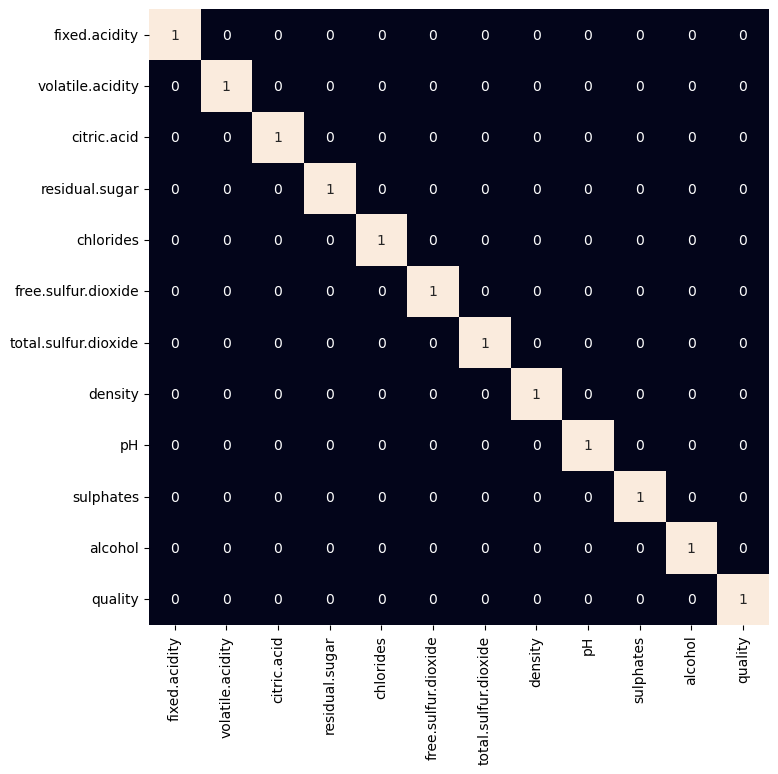

In [13]:
plt.figure(figsize=(8,8))
sb.heatmap(ds.corr()>0.7, annot=True, cbar=False)
plt.show()

Balancing the dataset
As seen above the two classes are not balanced so we will create two new dataframes, a good quality and a bad quality one

In [64]:
good_quality = ds[ds['quality']==1]
bad_quality = ds[ds['quality']==0]
#This line shuffles the DataFrame bad_quality. 
# It randomly reorders the rows, ensuring that the order of the rows in bad_quality is randomized.
bad_quality = bad_quality.sample(frac=1)
#This line selects the first 217 rows from the shuffled bad_quality DataFrame.
bad_quality = bad_quality[:217]
new_df = pd.concat([good_quality,bad_quality])
#This step ensures that the samples from both 'good_quality' and 'bad_quality' are mixed randomly, which can prevent any potential biases during model training.
new_df = new_df.sample(frac=1)
print(new_df['quality'].value_counts())

quality
1    217
0    217
Name: count, dtype: int64


In [65]:
x=new_df.drop(['quality'], axis=1)
y=new_df['quality']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(
    x, y, test_size=0.2,random_state=40)
x_train.shape, x_test.shape

((347, 11), (87, 11))

In [67]:
norm=MinMaxScaler()
x_train_norm=norm.fit_transform(x_train)
x_test_norm=norm.fit_transform(x_test)


1. LOGISTIC REGRESSION

In [68]:
from sklearn.metrics import accuracy_score

model_lr=LogisticRegression()
model_lr.fit(x_train_norm, y_train)
predictions_lr=model_lr.predict(x_test_norm)
model_lr.score(x_test_norm, y_test)
accuracy_lr=accuracy_score(y_test, predictions_lr)
print(accuracy_lr)


0.7241379310344828


In [69]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,predictions_lr )
print(cm_lr)

[[39  6]
 [18 24]]


In [72]:
model_svc=SVC(kernel='rbf', C=1.0)
model_svc.fit(x_train_norm, y_train)
predictions_svc=model_svc.predict(x_test_norm)
accuracy_svc=accuracy_score(y_test,predictions_svc)
print(accuracy_svc)

0.6896551724137931


In [71]:
cm_svc = confusion_matrix(y_test,predictions_svc )
print(cm_svc)

[[34 11]
 [16 26]]


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

param = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}
grid_rf = GridSearchCV(RandomForestClassifier(),param,scoring='accuracy',cv=10,)
grid_rf.fit(x_train_norm, y_train)
print('Best parameters --> ', grid_rf.best_params_)
# Wine Quality Prediction
pred = grid_rf.predict(x_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))


Best parameters -->  {'n_estimators': 600}
[[41  4]
 [23 19]]


              precision    recall  f1-score   support

           0       0.64      0.91      0.75        45
           1       0.83      0.45      0.58        42

    accuracy                           0.69        87
   macro avg       0.73      0.68      0.67        87
weighted avg       0.73      0.69      0.67        87



0.6896551724137931


In [77]:
accuracy_rf=accuracy_score(y_test,pred)

In [79]:
results = pd.DataFrame([["Logistic Regression",accuracy_lr],["SVM",accuracy_svc],["Random Forest",accuracy_rf]],columns=["Model","Accuracy"])
results

,Model,Accuracy
0,Logistic Regression,0.724138
1,SVM,0.689655
2,Random Forest,0.689655
